In [ ]:
!pip install gensim

# No Professional

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import gensim
from gensim.models import Word2Vec
from datasets import load_dataset
from gensim import utils

In [ ]:
train_dataset = load_dataset('rotten_tomatoes', split='train')
test_dataset = load_dataset('rotten_tomatoes', split='test')
print(len(train_dataset), len(test_dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

8530 1066


In [ ]:
class RottenTomatoesCorpus:
  def __init__(self, sentences):
    self.sentences = sentences
  def __iter__(self):
    for review in self.sentences:
      yield utils.simple_preprocess(gensim.parsing.preprocessing.remove_stopwords(review))

In [ ]:
sentences = train_dataset['text']
corpus = RottenTomatoesCorpus(sentences)

In [ ]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)
model.train(corpus_iterable=corpus, total_examples=model.corpus_count, epochs=100)
model.save("/content/drive/MyDrive/Load_model/rotten_tomato_word2vec.model")

In [ ]:
!git clone https://github.com/PacktPublishing/Python-Natural-Language-Processing-Cookbook-Second-Edition.git

Cloning into 'Python-Natural-Language-Processing-Cookbook-Second-Edition'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 433 (delta 11), reused 6 (delta 2), pack-reused 409 (from 1)
Receiving objects: 100% (433/433), 18.28 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [ ]:
(analogy_score, word_list) = model.wv.evaluate_word_analogies('/content/Python-Natural-Language-Processing-Cookbook-Second-Edition/data/questions-words.txt')
print(analogy_score)

0.0010587612493382743


In [ ]:
import gensim.downloader as api

pretrained_model = api.load('word2vec-google-news-300')

[======--------------------------------------------] 12.1% 201.5/1662.8MB downloaded

In [ ]:
pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin.gz', binary=True)
(analogy_score, word_list) = pretrained_model.evaluate_word_analogies('../data/questions-words.txt')
print(analogy_score)

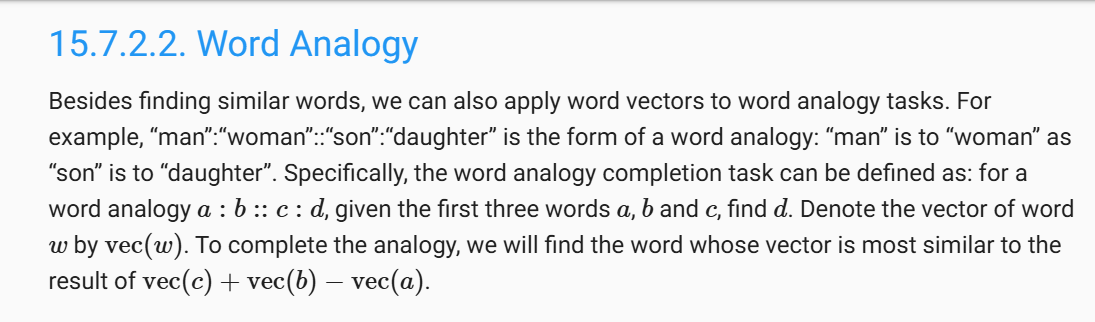

In [ ]:
# Instead of:
# pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Load_model/rotten_tomato_word2vec.model', binary=True)

# Use this:
pretrained_model = Word2Vec.load('/content/drive/MyDrive/Load_model/rotten_tomato_word2vec.model')
pretrained_model = pretrained_model.wv # Access the KeyedVectors instance

# The rest of your code should remain the same:
(analogy_score, word_list) = pretrained_model.evaluate_word_analogies('/content/Python-Natural-Language-Processing-Cookbook-Second-Edition/data/questions-words.txt')
print(analogy_score)

0.0010587612493382743


# Professional

In [ ]:
import gensim
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
import pickle
from os import listdir
from os.path import isfile, join
from Chapter03.bag_of_words import get_sentences
from Chapter01.tokenization import tokenize_nltk

word2vec_model_path = "word2vec.model"
books_dir = "1025_1853_bundle_archive"
evaluation_file = "Chapter03/questions-words.txt"
pretrained_model_path = "Chapter03/40/model.bin"

def train_word2vec(words, word2vec_model_path):
    #model = gensim.models.Word2Vec(
    #    words,
    #    size=50,
    #    window=7,
    #    min_count=1,
    #    workers=10)
    model = gensim.models.Word2Vec(words, window=5, size=200, min_count=5)
    model.train(words, total_examples=len(words), epochs=200)
    pickle.dump(model, open(word2vec_model_path, 'wb'))
    return model

def get_all_book_sentences(directory):
    text_files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and ".txt" in f]
    all_sentences = []
    for text_file in text_files:
        sentences = get_sentences(text_file)
        all_sentences = all_sentences + sentences
    return all_sentences

def test_model():
    model = pickle.load(open(word2vec_model_path, 'rb'))
    words = list(model.wv.vocab)
    print(words)
    w1 = "river"
    words = model.wv.most_similar(w1, topn=10)
    print(words)

def evaluate_model(model, filename):
    return model.wv.accuracy(filename)

def main():
    sentences = get_all_book_sentences(books_dir)
    sentences = [tokenize_nltk(s.lower()) for s in sentences]
    #model = train_word2vec(sentences)
    #test_model()
    model = pickle.load(open(word2vec_model_path, 'rb'))
    #accuracy_list = evaluate_model(model, evaluation_file)
    #print(accuracy_list)
    (analogy_score, word_list) = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
    print(analogy_score)
    pretrained_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)
    (analogy_score, word_list) = pretrained_model.evaluate_word_analogies(datapath('questions-words.txt'))
    print(analogy_score)

if (__name__ == "__main__"):
    main()